In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [183]:
df = pd.read_csv('Taxi_Trips_2022.csv',usecols=['Trip Start Timestamp','Trip Seconds','Trip Miles','Pickup Community Area' ,'Dropoff Community Area'])
df.head()

C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35536\3568463546.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Taxi_Trips_2022.csv',usecols=['Trip Start Timestamp','Trip Seconds','Trip Miles','Pickup Community Area' ,'Dropoff Community Area'])


,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area
0,12/31/2022 11:45:00 PM,618,1.02,32.0,8.0
1,12/31/2022 11:45:00 PM,"3,029",12.93,NaN,38.0
2,12/31/2022 11:45:00 PM,8,0.0,33.0,33.0
3,12/31/2022 11:45:00 PM,483,3.75,8.0,6.0
4,12/31/2022 11:45:00 PM,986,3.29,24.0,7.0


In [184]:
df.dropna(subset=['Trip Start Timestamp','Pickup Community Area', 'Dropoff Community Area'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )

In [185]:
df["start"]=df["Trip Start Timestamp"].map(lambda x:x.split(" ")[0])
df["start"]=pd.to_datetime(df["start"], format='%m/%d/%Y')
df["number of weeks"] =  df["start"].dt.isocalendar().week
df=df[['Trip Seconds',"Trip Miles","Pickup Community Area","Dropoff Community Area","start","number of weeks"]]
df

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start,number of weeks
0,618,1.02,32.0,8.0,2022-12-31,52
2,8,0.0,33.0,33.0,2022-12-31,52
3,483,3.75,8.0,6.0,2022-12-31,52
4,986,3.29,24.0,7.0,2022-12-31,52
6,540,0.0,8.0,8.0,2022-12-31,52
...,...,...,...,...,...,...
6382420,598,6.64,8.0,77.0,2022-01-01,52
6382421,"1,300",7.77,8.0,19.0,2022-01-01,52
6382422,"2,254",9.26,77.0,32.0,2022-01-01,52
6382423,"1,080",1.5,8.0,32.0,2022-01-01,52


In [186]:
df["year"]=df["start"].dt.isocalendar().year
df["num_weeks"]=df["number of weeks"]+(df["year"]-2019)*52

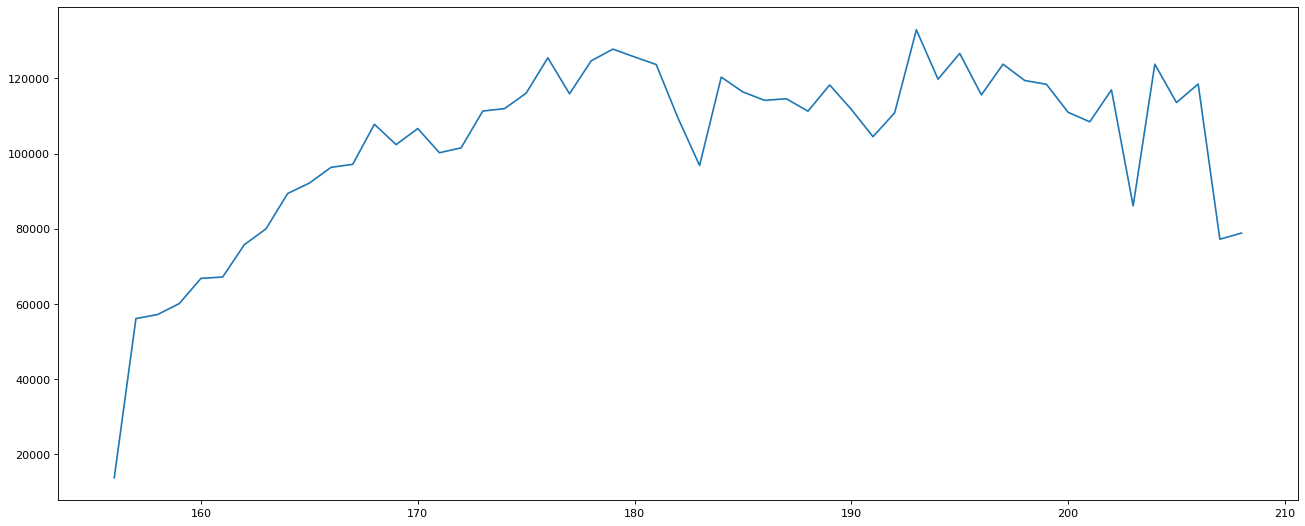

In [187]:
count=df['num_weeks'].value_counts()
x=list(range(df["num_weeks"].min(),df["num_weeks"].max()+1))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])

In [188]:
count_area=df['Dropoff Community Area'].groupby(df['Pickup Community Area']).value_counts()

In [189]:
count_area

Pickup Community Area  Dropoff Community Area
1.0                    1.0                       6260
                       8.0                       3961
                       32.0                      2763
                       77.0                      2692
                       2.0                       2600
                                                 ... 
77.0                   64.0                         3
                       52.0                         1
                       57.0                         1
                       62.0                         1
                       74.0                         1
Name: count, Length: 5419, dtype: int64

In [190]:
count_area[1,73]

np.int64(25)

In [191]:
df1=df[(df["Pickup Community Area"]==1)&(df["Dropoff Community Area"]==1)]
df1

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start,number of weeks,year,num_weeks
192,3,0.0,1.0,1.0,2022-12-31,52,2022,208
327,3,0.0,1.0,1.0,2022-12-31,52,2022,208
1759,606,0.76,1.0,1.0,2022-12-31,52,2022,208
1860,606,0.76,1.0,1.0,2022-12-31,52,2022,208
4269,804,0.0,1.0,1.0,2022-12-31,52,2022,208
...,...,...,...,...,...,...,...,...
6380259,156,0.67,1.0,1.0,2022-01-01,52,2021,156
6380403,15,0.0,1.0,1.0,2022-01-01,52,2021,156
6380783,720,1.6,1.0,1.0,2022-01-01,52,2021,156
6381012,540,1.8,1.0,1.0,2022-01-01,52,2021,156


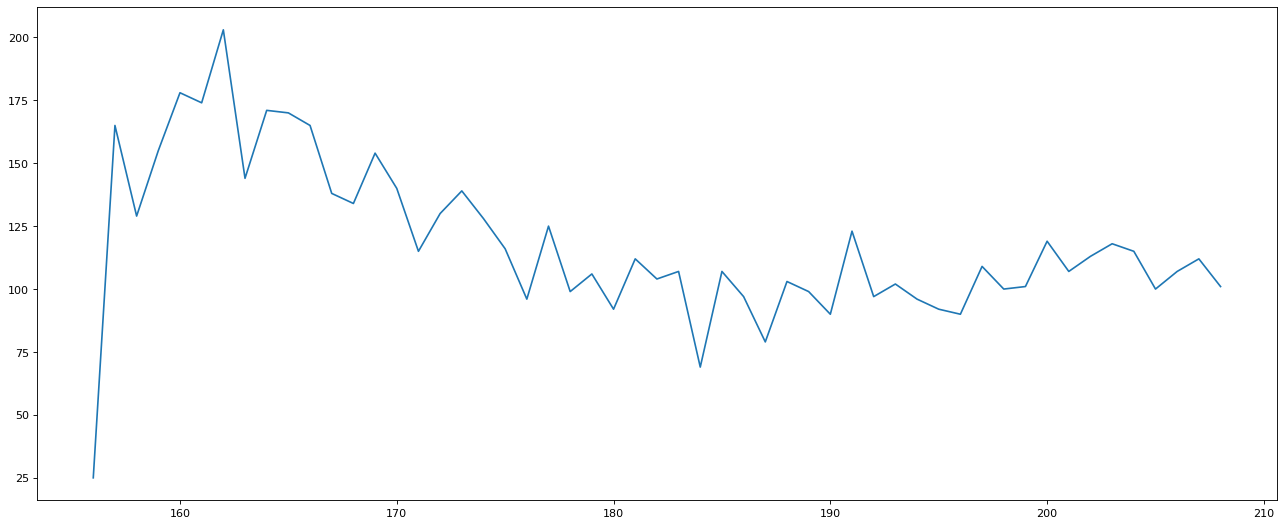

In [192]:
count1=df1['num_weeks'].value_counts()
x=list(range(df["num_weeks"].min(),df["num_weeks"].max()+1))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count1[x])

In [193]:
od_list=[]
for i in range(1,78):
    for j in range(1,78):
        if (i,j) in count_area.index:
            # if (count_area[i,j]>5000):
            od_list.append((i,j))
od_list

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (1, 51),
 (1, 52),
 (1, 53),
 (1, 54),
 (1, 55),
 (1, 56),
 (1, 57),
 (1, 58),
 (1, 59),
 (1, 60),
 (1, 61),
 (1, 63),
 (1, 64),
 (1, 65),
 (1, 66),
 (1, 67),
 (1, 68),
 (1, 69),
 (1, 70),
 (1, 71),
 (1, 72),
 (1, 73),
 (1, 74),
 (1, 75),
 (1, 76),
 (1, 77),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26)

In [194]:
len(od_list)

5419

In [195]:
odtrips=[]
w_min = df['num_weeks'].min()
w_max = df['num_weeks'].max()
for i in range(0,len(od_list)):   
    df_area=df[(df["Pickup Community Area"]==od_list[i][0])&(df["Dropoff Community Area"]==od_list[i][1])]
    count_area=df_area['num_weeks'].value_counts()
    #array=np.zeros(len(count_area))
    for j in range(w_min, w_max+1):
        if j in count_area.index:
            #array[j-1]=count_area[j]
            odtrips.append(count_area[j])
        else:
            odtrips.append(0)

In [196]:
s=int(len(odtrips)/(w_max - w_min + 1))
odtrips = np.asmatrix(odtrips).reshape(s,w_max - w_min + 1)
odtrips = np.array(odtrips)
odtrips

array([[ 25, 165, 129, ..., 107, 112, 101],
       [  7,  63,  50, ...,  39,  40,  45],
       [ 12,  37,  38, ...,  54,  52,  45],
       ...,
       [  0,   1,   0, ...,   0,   0,   0],
       [  1,  30,  25, ...,  67,  95,  33],
       [ 62, 381, 304, ..., 288, 285, 329]], shape=(5419, 53))

In [197]:
df_od = pd.DataFrame(odtrips, columns = [i for i in range(w_min,w_max+1)])
df_od.index = od_list
df_od.to_csv('taxi_od_weekly_counts_2022.csv')

# Clustering implementation: K-means with DTW

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [35]:
df = pd.DataFrame()
for y in [2019,2020,2021,2022]:
    df_year = pd.read_csv(f'taxi_od_weekly_counts_{y}.csv', index_col=0)
    df = pd.concat([df,df_year], axis=1)
df.columns = [f"week_{i}" for i in range(1,df.shape[1]+1)]
df.fillna(0, inplace=True)

In [36]:
# filtering OD pairs with very few trips across all weeks can be done here
df = df.iloc[:, 55:95]
num_filters = 500
df = df[(df.sum(axis=1) > num_filters)]
df.shape

(357, 40)

In [37]:
import sys
from clustering import DTWClustering

%matplotlib inline

In [38]:
odtrips = df.values
# perform min-max normalization
row_min = odtrips.min(axis=1, keepdims=True)
row_max = odtrips.max(axis=1, keepdims=True)
odtrips = (odtrips - row_min) / (row_max - row_min)
np.save('taxi_od_week.npy',odtrips)
odtrips

array([[0.69402985, 0.90547264, 0.69651741, ..., 0.30099502, 0.29104478,
        0.3358209 ],
       [0.83448276, 0.75862069, 1.        , ..., 0.28275862, 0.1862069 ,
        0.26896552],
       [0.77011494, 1.        , 0.86206897, ..., 0.24137931, 0.22988506,
        0.34482759],
       ...,
       [0.90839695, 0.77099237, 0.82442748, ..., 0.29770992, 0.35877863,
        0.22900763],
       [0.8358209 , 0.86567164, 0.80597015, ..., 0.14925373, 0.08955224,
        0.20895522],
       [0.93193717, 0.79232112, 0.87260035, ..., 0.32286213, 0.21815009,
        0.2582897 ]], shape=(357, 40))

In [39]:
model = DTWClustering(odtrips, 4)

In [40]:
model.train()

0.000319099985063076 queue placement complete
0.5689210999989882 computations complete
0.5691729999962263 iteration complete
0.00031220001983456314 queue placement complete
0.601826300000539 computations complete
0.6021123999962583 iteration complete
0.0003446000046096742 queue placement complete
0.5011238000006415 computations complete
0.5013651000044774 iteration complete
0.00032140000257641077 queue placement complete
0.49210990002029575 computations complete
0.49243980000028387 iteration complete
0.00034440000308677554 queue placement complete
0.4913208000070881 computations complete
0.4916090000187978 iteration complete
0.0003364000003784895 queue placement complete
0.4929382000118494 computations complete
0.49351660002139397 iteration complete
0.000520800007507205 queue placement complete
0.5005450999888126 computations complete
0.5008508999890182 iteration complete
0.0004993000184185803 queue placement complete
0.4952659000118729 computations complete
0.4956370000145398 iteratio

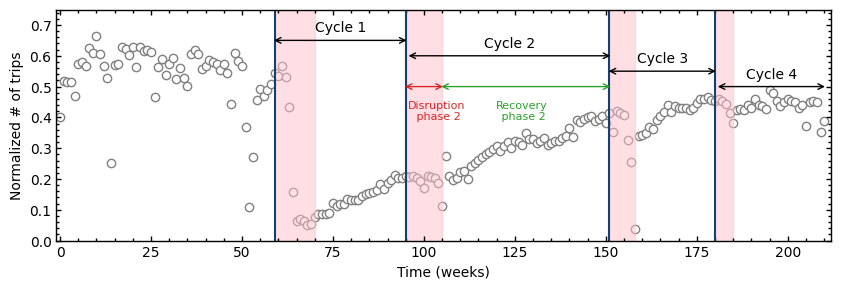

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
# ax.grid(linestyle=':')
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

ax.scatter(np.arange(len(model.centroids[0])), np.mean(model.centroids, axis=0), 
           facecolor='white', edgecolors="grey")

ax.vlines(x=[59,95,151,180], ymin=0, ymax=0.75, colors='#124170', linestyles='-', linewidth=1.5)
ax.fill_betweenx(y=[0,0.75], x1=59, x2=70, color='pink', alpha=0.5)
ax.fill_betweenx(y=[0,0.75], x1=95, x2=105, color='pink', alpha=0.5)
ax.fill_betweenx(y=[0,0.75], x1=151, x2=158, color='pink', alpha=0.5)
ax.fill_betweenx(y=[0,0.75], x1=180, x2=185, color='pink', alpha=0.5)
# ax.fill_betweenx(y=[0,0.75], x1=-1, x2=59, color='grey', alpha=0.2)
# Cycle 1
ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(96, 0.65),                # end point
    xytext=(58, 0.65),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
    ))
# Add centered text on top of the line
ax.text(
    (58 + 96) / 2, 0.69,          # center x, same y
    'Cycle 1',          # your text
    ha='center', va='center')

# Cycle 2
ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(152, 0.6),                # end point
    xytext=(95, 0.6),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
    ))
# Add centered text on top of the line
ax.text(
    (95 + 152) / 2, 0.64,          # center x, same y
    'Cycle 2',          # your text
    ha='center', va='center')

# Cycle 3
ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(181, 0.55),                # end point
    xytext=(150, 0.55),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
    ))
# Add centered text on top of the line
ax.text(
    (150 + 181) / 2, 0.59,          # center x, same y
    'Cycle 3',          # your text
    ha='center', va='center')

# Cycle 4
ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(211, 0.5),                # end point
    xytext=(180, 0.5),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
    ))
# Add centered text on top of the line
ax.text(
    (180 + 211) / 2, 0.54,          # center x, same y
    'Cycle 4',          # your text
    ha='center', va='center')

ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(106, 0.5),                # end point
    xytext=(94, 0.5),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
        color='tab:red'
    ))
ax.text(
    (94 + 113) / 2, 0.42,
    'Disruption\n phase 2',
    ha='center', va='center', fontsize=8, color='tab:red')

ax.annotate(
    '',                        # no text for the annotate arrow itself
    xy=(152, 0.5),                # end point
    xytext=(104, 0.5),            # start point
    arrowprops=dict(
        arrowstyle='<->',      # arrow both ends
        linewidth=1,
        color='tab:green'
    ))
ax.text(
    (94 + 160) / 2, 0.42,
    'Recovery\n phase 2',
    ha='center', va='center', fontsize=8, color='tab:green')

ax.set_xlabel("Time (weeks)")
ax.set_ylabel("Normalized # of trips")
ax.set_ylim(0,0.75)
ax.set_xlim(-1,212)

# fig.savefig("figures/multi_cycles.png", dpi=800, transparent=True, bbox_inches='tight')
fig.savefig("figures/multi_cycles.pdf", bbox_inches='tight')

In [401]:
model.clusters

{1: [2,
  19,
  7,
  8,
  29,
  32,
  27,
  15,
  25,
  36,
  10,
  23,
  53,
  34,
  52,
  28,
  56,
  1,
  17,
  18,
  60,
  59,
  77,
  54,
  71,
  79,
  61,
  80,
  57,
  72,
  98,
  103,
  111,
  73,
  120,
  108,
  112,
  117,
  86,
  115,
  127,
  128,
  133,
  135,
  140,
  141,
  142,
  146,
  151,
  148,
  154,
  166,
  167,
  172,
  175,
  192,
  194,
  195,
  203,
  222,
  223,
  255,
  256,
  257,
  258,
  263,
  266,
  279,
  280,
  291,
  301,
  299,
  300,
  308,
  309],
 0: [6,
  26,
  31,
  41,
  33,
  38,
  63,
  75,
  74,
  0,
  83,
  87,
  85,
  81,
  105,
  114,
  58,
  107,
  106,
  109,
  118,
  122,
  110,
  123,
  129,
  130,
  131,
  137,
  144,
  143,
  147,
  149,
  152,
  155,
  170,
  176,
  178,
  177,
  180,
  181,
  182,
  184,
  183,
  179,
  185,
  188,
  187,
  189,
  200,
  298],
 2: [9,
  4,
  11,
  84,
  136,
  150,
  159,
  160,
  162,
  168,
  169,
  165,
  213,
  221,
  224,
  225,
  228,
  229,
  227,
  230,
  231,
  232,
  234,
  235,
  241,

1
0
2
4
5
3


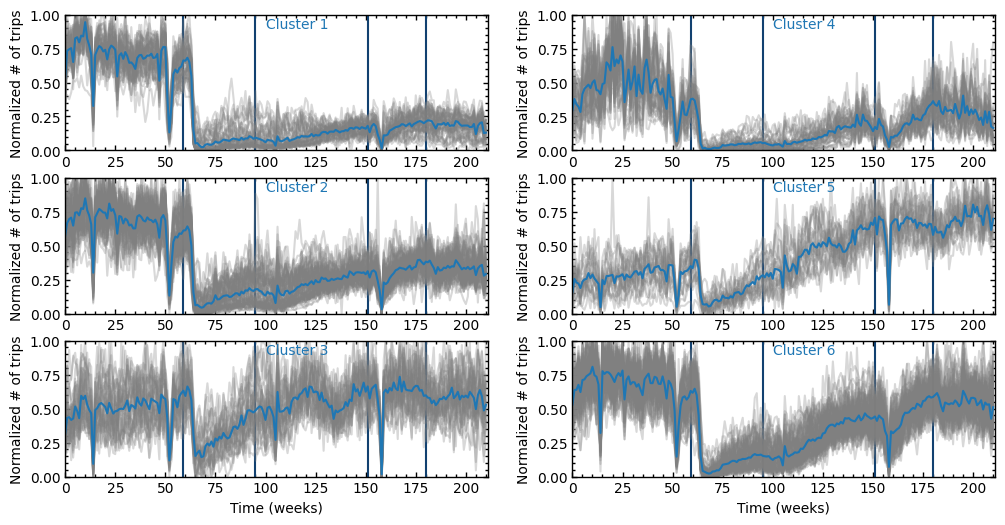

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,6))
for centroid_key in model.clusters:
    ax[centroid_key%3,int(centroid_key/3)].tick_params(direction='in', top=True, right=True, which='both', width=1)
    ax[centroid_key%3,int(centroid_key/3)].spines[['bottom','top','left','right']].set_linewidth(1)
    ax[centroid_key%3,int(centroid_key/3)].yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[centroid_key%3,int(centroid_key/3)].xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[centroid_key%3,int(centroid_key/3)].vlines(x=[59,95,151,180], ymin=0, ymax=1, colors='#124170', linestyles='-', linewidth=1.5)

    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        ax[centroid_key%3,int(centroid_key/3)].plot(np.arange(len(series)), series, color='grey', alpha=0.3)
    ax[centroid_key%3,int(centroid_key/3)].plot(np.arange(len(series)), model.centroids[centroid_key], color='tab:blue')
    ax[centroid_key%3,int(centroid_key/3)].text(100, 0.9, f'Cluster {centroid_key+1}', color='tab:blue')

    if centroid_key%3 == 2:
        ax[centroid_key%3,int(centroid_key/3)].set_xlabel("Time (weeks)")
    # if int(centroid_key/3) == 0:
    #     ax[centroid_key%3,int(centroid_key/3)].set_ylabel("Normalized # of trips")
    # if int(centroid_key/3) == 1:
    #     ax[centroid_key%3,int(centroid_key/3)].set_yticklabels([])
    ax[centroid_key%3,int(centroid_key/3)].set_ylabel("Normalized # of trips")
    ax[centroid_key%3,int(centroid_key/3)].set_xlim(0,211)
    ax[centroid_key%3,int(centroid_key/3)].set_ylim(0,1)
    
fig.savefig(f"figures/clustering.pdf", bbox_inches='tight')

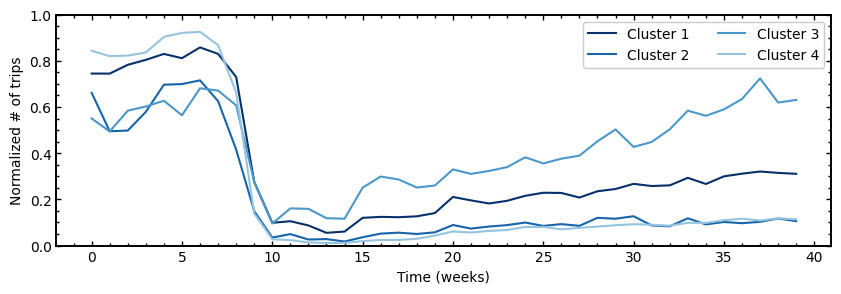

In [41]:
fig, ax = plt.subplots(figsize=(10,3))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1.4)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# ax.vlines(x=[59,95,151,180], ymin=0, ymax=1, colors='#124170', linestyles='-', linewidth=1.5)
# ax.fill_betweenx(y=[0,1], x1=59, x2=70, color='pink', alpha=0.5)
# ax.fill_betweenx(y=[0,1], x1=95, x2=105, color='pink', alpha=0.5)
# ax.fill_betweenx(y=[0,1], x1=151, x2=158, color='pink', alpha=0.5)
# ax.fill_betweenx(y=[0,1], x1=180, x2=185, color='pink', alpha=0.5)

cmap = plt.cm.Blues
colors = [cmap((5-i)/5) for i in range(5)]
for i, centroid in enumerate(model.centroids):
    ax.plot(np.arange(len(centroid)), centroid, color=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel("Time (weeks)")
ax.set_ylabel("Normalized # of trips")
# ax.set_xlim(0,211)
ax.set_ylim(0,1)
ax.legend(ncols=2, facecolor='white', framealpha=1)
# fig.savefig(f"figures/clusters_center.pdf", bbox_inches='tight')

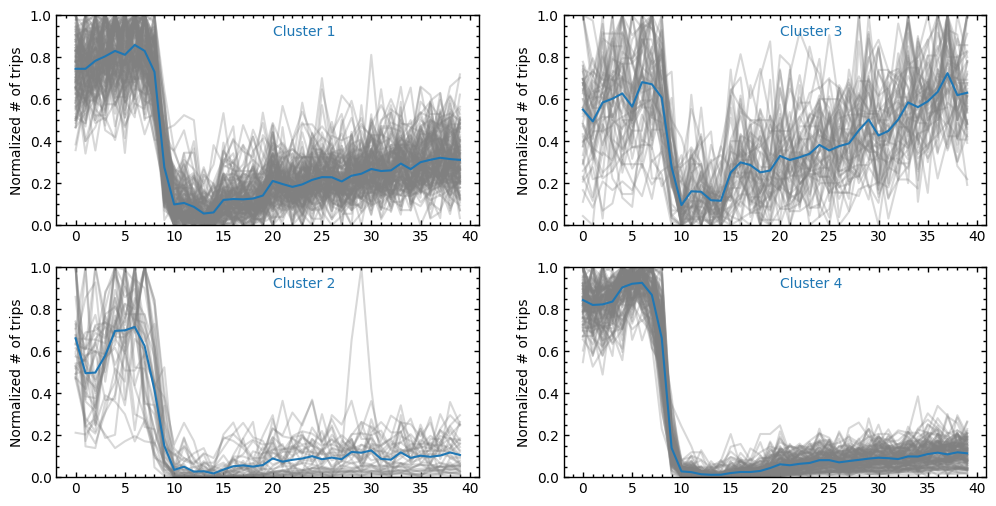

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
for centroid_key in model.clusters:
    ax[centroid_key%2,int(centroid_key/2)].tick_params(direction='in', top=True, right=True, which='both', width=1)
    ax[centroid_key%2,int(centroid_key/2)].spines[['bottom','top','left','right']].set_linewidth(1)
    ax[centroid_key%2,int(centroid_key/2)].yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[centroid_key%2,int(centroid_key/2)].xaxis.set_minor_locator(tck.AutoMinorLocator())

    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        ax[centroid_key%2,int(centroid_key/2)].plot(np.arange(len(series)), series, color='grey', alpha=0.3)
    ax[centroid_key%2,int(centroid_key/2)].plot(np.arange(len(series)), model.centroids[centroid_key], color='tab:blue')
    ax[centroid_key%2,int(centroid_key/2)].text(20, 0.9, f'Cluster {centroid_key+1}', color='tab:blue')

    if centroid_key%2 == 2:
        ax[centroid_key%2,int(centroid_key/2)].set_xlabel("Time (weeks)")
    ax[centroid_key%2,int(centroid_key/2)].set_ylabel("Normalized # of trips")
    # ax[centroid_key%2,int(centroid_key/2)].set_xlim(0,211)
    ax[centroid_key%2,int(centroid_key/2)].set_ylim(0,1)
    
# fig.savefig(f"figures/clustering.pdf", bbox_inches='tight')

In [46]:
import numpy as np
from scipy.optimize import minimize

def resilience_curve(t, mu, sigma, params):
    """
    Connected Z-shaped + flapped Z resilience curve.
    
    t : array of time steps
    mu, sigma : mean and std of the time series
    params : list or array of global parameters
        [alpha_d, beta_d, k_d, v_d,
         alpha_r, beta_r, k_r, v_r, m,
         t0_d, t0_r, tc, ks]
    """
    (alpha_d, beta_d, k_d, v_d,
     alpha_r, beta_r, k_r, v_r, m,
     t0_d, t0_r, tc, ks) = params
    
    # Phase amplitudes
    A_d = alpha_d * sigma + beta_d * mu
    A_r = alpha_r * sigma + beta_r * mu
    
    # Disruption phase
    D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
    
    # Recovery phase
    R = A_r / (1 + np.exp(-k_r * (t - t0_r)))**v_r + mu - A_r/2 + m * (t - t0_r)
    
    # Smooth transition
    S = 1 / (1 + np.exp(-ks * (t - tc)))
    
    return (1 - S) * D + S * R

def loss(params, data, time):
    n_series = data.shape[0]
    loss_val = 0.0
    for i in range(n_series):
        series = data[i]
        mu = np.mean(series)
        sigma = np.std(series)
        pred = resilience_curve(time, mu, sigma, params)
        loss_val += np.sum((series - pred)**2)
    return loss_val

In [126]:
c = 0
data = odtrips[model.clusters[c]]
time = np.arange(data.shape[1])
# Initial guess
# cluster 0:
params0 = np.array([0.5, 0.5, 1.0, 1.0,
                    0.5, 0.5, 1.0, 1.0, 0.0,
                    5.0, 1, 1, 1.0])
# others:
# params0 = np.array([0.5, 0.5, 1.0, 1.0,
#                     0.5, 0.5, 1.0, 1.0, 0.0,
#                     5.0, 15.0, 10.0, 1.0])

res = minimize(loss, params0, args=(data, time), method='L-BFGS-B')

best_params = res.x
print("Fitted global parameters:", best_params)

C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:24: RuntimeWarning: overflow encountered in power
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2


Fitted global parameters: [-4.86162219e-01  4.74355110e-02  9.62238373e+00  1.14062524e+01
  5.81666125e+00  1.81239783e-05 -8.47326642e+00  7.66150174e-02
  3.07299318e-02  8.03011120e+00  7.79399914e+00  1.06727274e+01
 -9.32822636e-02]


C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:27: RuntimeWarning: overflow encountered in exp
  R = A_r / (1 + np.exp(-k_r * (t - t0_r)))**v_r + mu - A_r/2 + m * (t - t0_r)
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:27: RuntimeWarning: divide by zero encountered in divide
  R = A_r / (1 + np.exp(-k_r * (t - t0_r)))**v_r + mu - A_r/2 + m * (t - t0_r)
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:42: RuntimeWarning: overflow encountered in square
  loss_val += np.sum((series - pred)**2)
d:\Software\anaconda3\envs\cav_platoon\Lib\site-packages\scipy\optimize\_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:24: RuntimeWarning: overflow encountered in power
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:24: RuntimeWarning: overflow encountered in power
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:24: RuntimeWarning: overflow encountered in power
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:24: RuntimeWarning: overflow encountered in power
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:24: RuntimeWarning: overflow encountered in power
  D = A_d / (1 + np.exp(-k_d * (t - t0_d)))**v_d + mu - A_d/2
C:\Users\ql.lu\AppData\Local\Temp\ipykernel_35404\2138714118.py:24: RuntimeWarning: overflow encountered in power
  D = 

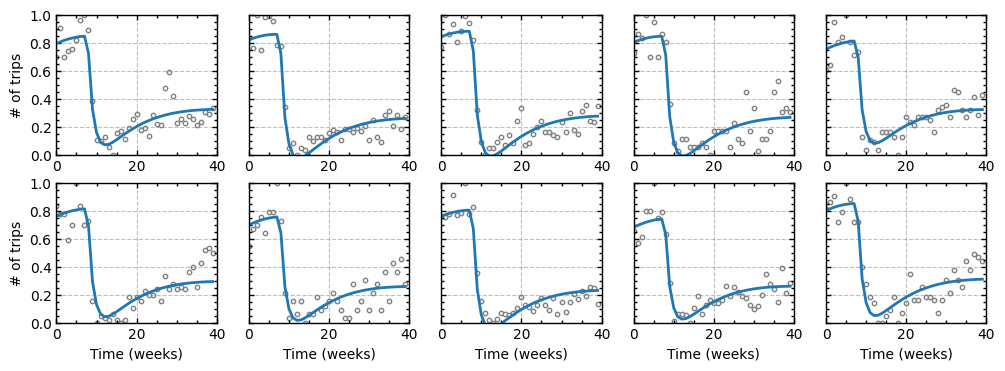

In [ ]:
series_indices = range(10)  # first 10 series
ncols = 5
nrows = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,4))
for i in series_indices:
    series = data[i]
    mu = np.mean(series)
    sigma = np.std(series)
    fitted = resilience_curve(time, mu, sigma, best_params)
    
    ax[int(i/ncols),i%ncols].tick_params(direction='in', top=True, right=True, which='both', width=1)
    ax[int(i/ncols),i%ncols].spines[['bottom','top','left','right']].set_linewidth(1)
    ax[int(i/ncols),i%ncols].yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[int(i/ncols),i%ncols].xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax[int(i/ncols),i%ncols].scatter(time, series, edgecolors='grey', facecolors='white', s=10)
    ax[int(i/ncols),i%ncols].plot(time, fitted, '-', label='Fitted', linewidth=2)
    ax[int(i/ncols),i%ncols].grid(True, linestyle='--', color='gray', alpha=0.5)
    if int(i/ncols) == 1:
        ax[int(i/ncols),i%ncols].set_xlabel("Time (weeks)")
    if i%ncols == 0:
        ax[int(i/ncols),i%ncols].set_ylabel("# of trips")
    else:
        ax[int(i/ncols),i%ncols].set_yticklabels([])
    ax[int(i/ncols),i%ncols].grid(True)
    ax[int(i/ncols),i%ncols].set_xlim(0,40)
    ax[int(i/ncols),i%ncols].set_ylim(0,1)
fig.savefig(f"figures/resilience_fit_cluster{c+1}.pdf", bbox_inches='tight')